In [1]:
import sklearn as sk
import pandas as pd

df = pd.read_csv('/Users/marcelosilva/Desktop/Hands-on/notebooks/3_classificação/titanic/train.csv')

In [4]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
import pandas_utils as pdu
pdu.custom_info(df)

DataFrame Info with Completeness Analysis:
---------------------------------------------------------------------------
Total Rows: 891
Total Columns: 12

Column Details:
---------------------------------------------------------------------------
PassengerId               891 non-null int64      (100.0% complete)
Survived                  891 non-null int64      (100.0% complete)
Pclass                    891 non-null int64      (100.0% complete)
Name                      891 non-null object     (100.0% complete)
Sex                       891 non-null object     (100.0% complete)
Age                       714 non-null float64    (80.13% complete) •
SibSp                     891 non-null int64      (100.0% complete)
Parch                     891 non-null int64      (100.0% complete)
Ticket                    891 non-null object     (100.0% complete)
Fare                      891 non-null float64    (100.0% complete)
Cabin                     204 non-null object     (22.9% complete) •
Emb

In [7]:
df = df.drop('Cabin', axis=1)
pdu.custom_info(df)

DataFrame Info with Completeness Analysis:
---------------------------------------------------------------------------
Total Rows: 891
Total Columns: 11

Column Details:
---------------------------------------------------------------------------
PassengerId               891 non-null int64      (100.0% complete)
Survived                  891 non-null int64      (100.0% complete)
Pclass                    891 non-null int64      (100.0% complete)
Name                      891 non-null object     (100.0% complete)
Sex                       891 non-null object     (100.0% complete)
Age                       714 non-null float64    (80.13% complete) •
SibSp                     891 non-null int64      (100.0% complete)
Parch                     891 non-null int64      (100.0% complete)
Ticket                    891 non-null object     (100.0% complete)
Fare                      891 non-null float64    (100.0% complete)
Embarked                  889 non-null object     (99.78% complete) •

M

In [8]:
pdu.full_analysis(df)

🔍 FULL DATAFRAME ANALYSIS
📊 Total Rows: 891 | Total Columns: 11 (7 numeric, 4 categorical, 0 other) | Memory: 0.27 MB

📊 INTEGRATED STATISTICS (Numeric Columns):
           PassengerId  Survived    Pclass         Age     SibSp     Parch  \
total_rows         891       891       891         891       891       891   
non_null           891       891       891         714       891       891   
complete_%       100.0     100.0     100.0    80.13468     100.0     100.0   
dtype            int64     int64     int64     float64     int64     int64   
count              891       891       891         714       891       891   
mean             446.0  0.383838  2.308642   29.699118  0.523008  0.381594   
median           446.0       0.0       3.0        28.0       0.0       0.0   
mode                 1         0         3        24.0         0         0   
std         257.353842  0.486592  0.836071   14.526497  1.102743  0.806057   
variance       66231.0  0.236772  0.699015  211.019125  1.

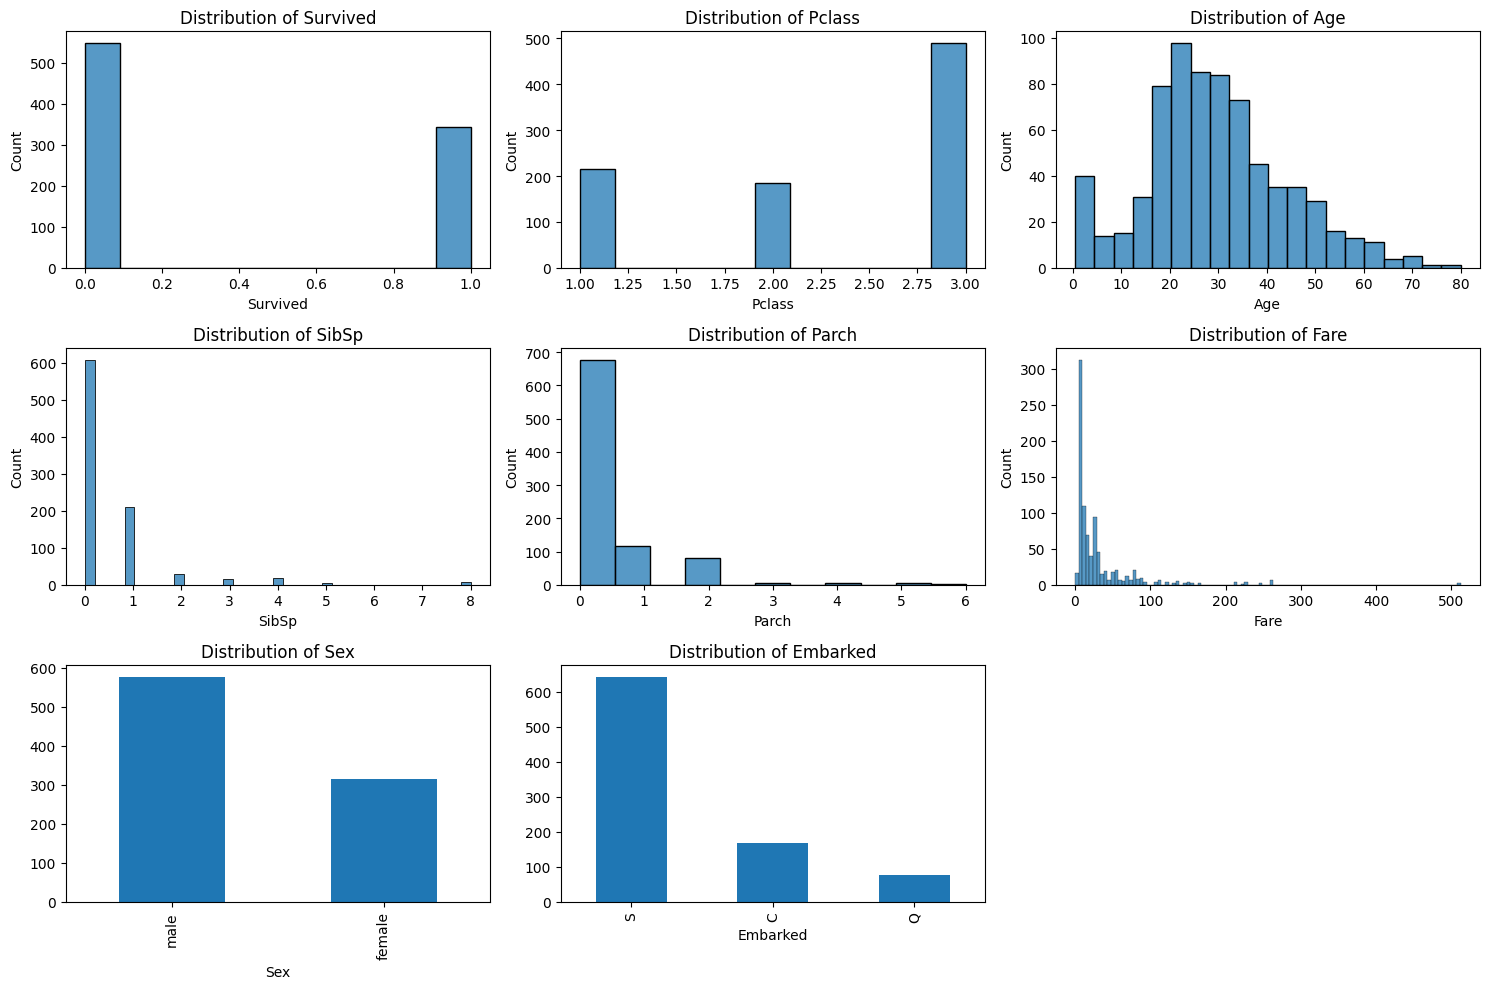

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(15, 10))

# Create histograms for numerical columns
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Sex', 'Embarked']

# Plot numerical columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    
# Plot categorical columns
for i, col in enumerate(categorical_cols, len(numerical_cols) + 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [12]:
# Display unique values and their counts in the Sex column
print("Unique values in Sex column:")
print(df['Sex'].unique())
print("\nValue counts in Sex column:")
print(df['Sex'].value_counts())

Unique values in Sex column:
['male' 'female']

Value counts in Sex column:
male      577
female    314
Name: Sex, dtype: int64


In [13]:
# Transform Sex to binary (0 for male, 1 for female)
df['Sex'] = (df['Sex'] == 'female').astype(int)

# One-hot encode Embarked
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Join the one-hot encoded columns with the original dataframe
df = pd.concat([df, embarked_dummies], axis=1)

# Drop the original Embarked column
df = df.drop('Embarked', axis=1)

# Display the first few rows to verify the changes
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500           0           0           1  
1          PC 17599  71.2833           1           0           0  
2  STON/O2. 3101282   7.9250           0           0           1  
3            113803  53.1000

In [14]:
pdu.full_analysis(df)

🔍 FULL DATAFRAME ANALYSIS
📊 Total Rows: 891 | Total Columns: 13 (11 numeric, 2 categorical, 0 other) | Memory: 0.18 MB

📊 INTEGRATED STATISTICS (Numeric Columns):
           PassengerId  Survived    Pclass       Sex         Age     SibSp  \
total_rows         891       891       891       891         891       891   
non_null           891       891       891       891         714       891   
complete_%       100.0     100.0     100.0     100.0    80.13468     100.0   
dtype            int64     int64     int64     int64     float64     int64   
count              891       891       891       891         714       891   
mean             446.0  0.383838  2.308642  0.352413   29.699118  0.523008   
median           446.0       0.0       3.0       0.0        28.0       0.0   
mode                 1         0         3         0        24.0         0   
std         257.353842  0.486592  0.836071   0.47799   14.526497  1.102743   
variance       66231.0  0.236772  0.699015  0.228475  211

In [15]:
# Fill NaN values in Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Verify the changes by checking for null values
print("Number of null values in Age column:", df['Age'].isnull().sum())

Number of null values in Age column: 0


In [16]:
pdu.full_analysis(df)

🔍 FULL DATAFRAME ANALYSIS
📊 Total Rows: 891 | Total Columns: 13 (11 numeric, 2 categorical, 0 other) | Memory: 0.18 MB

📊 INTEGRATED STATISTICS (Numeric Columns):
           PassengerId  Survived    Pclass       Sex         Age     SibSp  \
total_rows         891       891       891       891         891       891   
non_null           891       891       891       891         891       891   
complete_%       100.0     100.0     100.0     100.0       100.0     100.0   
dtype            int64     int64     int64     int64     float64     int64   
count              891       891       891       891         891       891   
mean             446.0  0.383838  2.308642  0.352413   29.361582  0.523008   
median           446.0       0.0       3.0       0.0        28.0       0.0   
mode                 1         0         3         0        28.0         0   
std         257.353842  0.486592  0.836071   0.47799   13.019697  1.102743   
variance       66231.0  0.236772  0.699015  0.228475  169

In [17]:
print("DataFrame columns:")
print(df.columns.tolist())

DataFrame columns:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


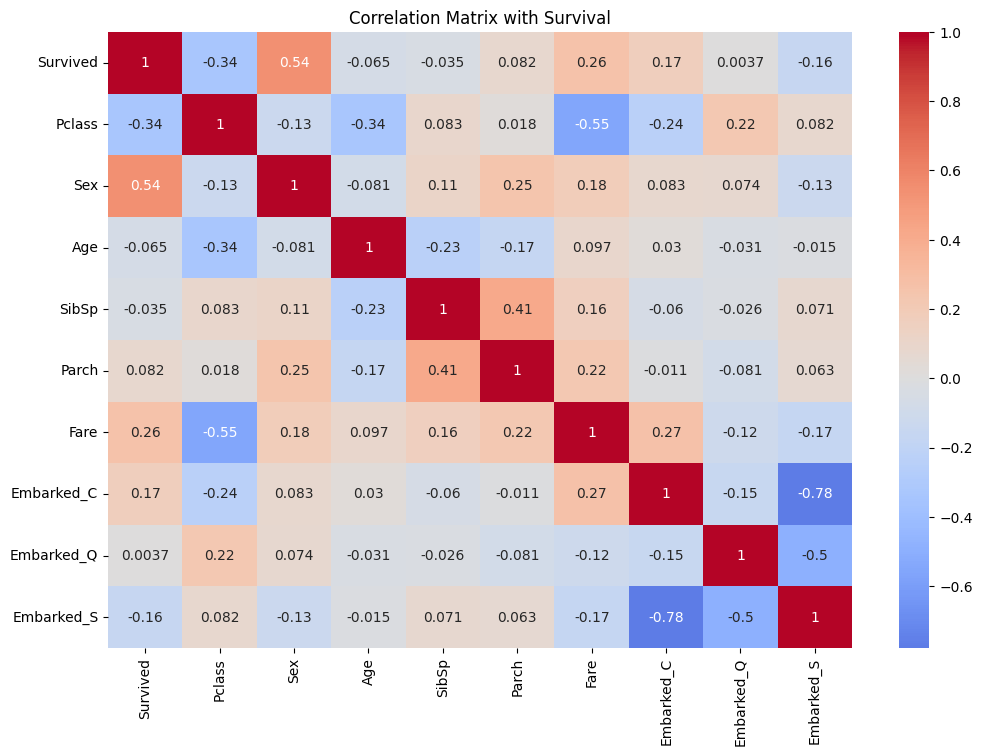

In [18]:
# Select numeric columns for correlation
numeric_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
correlation_matrix = df[numeric_cols].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix with Survival')
plt.show()